# Sound Attraction Analysis
This notebook is for comparison of the RW and RepAtt algorithm within a 50m x 50m simulation environment. The purpose of the investigation is to see the differences in navigation of a single robot when it is listening to a single sound source.

In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import pathlib
from glob import glob
from IPython.display import display
import os

In [29]:
allsoundResults = glob('../results/2019*attraction2sound')
display(allsoundResults)

soundResultPath = allsoundResults[1] + '/'

['../results\\2019-01-31-rectangle-RepAtt-vs-RW-attraction2sound',
 '../results\\2019-02-01-rectangle-RepAtt-vs-RW-attraction2sound']

## Create Readme
My simulations did not create a readme file which I can use to process the different algorithms used to simulate the attraction behaviour. So I need to create one

During this process, I also create a list of IDs that represent the different algorithms

In [30]:
IDList = []
with open(soundResultPath + 'readme2.md','w+') as f:
    for name in glob(soundResultPath + '*robot*'):
        name = name.replace('\\','/')
        name = name.split('/')
        name = name[-1].split('_')
        prefix = name[0]
        algID = prefix.split('-')
        algID = '-'.join(algID[1:-7])
        lineData = 'prefix:{},ID:{}\n'.format(prefix,algID)
        IDList.append(algID)
        f.write(lineData)
uniqIDs = pd.Series(IDList).unique()


## Create DataFrames

We will need dataframe that represents the logged data and dataframe to hold all instances of a particular parameter of interest for different simulation counts of a particular algorithm

In [31]:
def beacon_distance_plots(algIDsims,timeList,analysisFolder,ID):
    f = plt.figure()
    algIDsims.plot(ax=f.gca(),color=colors)
    plt.legend().set_visible(False)
    plt.xlabel('Time in Seconds')
    plt.ylabel('Distance in metres')
    plt.ylim([0, 15])
    plt.xticks(np.linspace(min(timeList),max(timeList),10))
    f.savefig(analysisFolder + ID + '.pdf', bbox_inches='tight')
#     plt.title(ID)
#     display(ID,algIDsims)
#     plt.legend().set_visible(True)
    
    plt.close()

In [32]:
def beacon_distance_analysis_plot(algIDsims,analysisFolder):
    colors = plt.cm.jet(np.linspace(0,1,len(algIDsims['Mean'].index))) # 30 different colors for 30 simulations per algorithm
    for cl in algIDsims['Mean'].columns:
        if 'Noise' in cl:
            col = cl.split('-')
            N = int(re.findall('\d+',col[1])[0])
            Q = int(re.findall('\d+',col[2])[0])
            col = '{}-N{:03d}-Q{:02d}'.format(col[0],N,Q)
            algIDsims['Mean'].rename(columns={cl:col},inplace=True)
            algIDsims['CI95'].rename(columns={cl:col},inplace=True)
        
    algIDsims['Mean'] = algIDsims['Mean'].transpose()
    algIDsims['Mean'] = algIDsims['Mean'].sort_index()
    
    algIDsims['CI95'] = algIDsims['CI95'].transpose()
    algIDsims['CI95'] = algIDsims['CI95'].sort_index()
    
    algIDsimsLatex = pd.DataFrame(index=algIDsims['Mean'].index,
                                 columns=algIDsims['Mean'].columns)
#     display(algIDsimsLatex)
#     display(algIDsims['STD'])
#     display(algIDsims['Mean'])
    for ind in algIDsims['Mean'].index:
        
        for col in algIDsims['Mean'].columns:
#             print(ind,col)
            algIDsimsLatex.loc[ind,col] = \
            '${:.2f} \pm {:.2f}$'.format(algIDsims['Mean'].loc[ind,col],
                                         algIDsims['CI95'].loc[ind,col])
   
    algIDsimsLatex.to_latex(analysisFolder + 'beacon_distance.tex',
                           encoding='utf-8', escape=False)
    f = plt.figure()
    algIDsims['Mean'].plot(kind='bar',ax = f.gca(),color=colors,stacked=True)
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5),title='Distance').set_visible(True)
    plt.ylabel('Time in Seconds')
    plt.xlabel('Algorithms')
    f.savefig(analysisFolder + 'beacon_distance.pdf', bbox_inches='tight')
    


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0-0.5,688.0,688.0,688.0,850.0,745.0,807.0,757.0,757.0,757.0,757.0,...,745.0,745.0,893.0,745.0,810.0,758.0,758.0,694.0,760.0,778.0
0.5-0.8,289.0,289.0,289.0,86.0,213.0,126.0,194.0,194.0,194.0,194.0,...,213.0,213.0,80.0,213.0,159.0,99.0,99.0,283.0,196.0,180.0
0.8-1.0,2.0,2.0,2.0,46.0,25.0,44.0,31.0,31.0,31.0,31.0,...,25.0,25.0,2.0,25.0,13.0,34.0,34.0,2.0,17.0,15.0
> 1.0,20.0,20.0,20.0,17.0,16.0,22.0,17.0,17.0,17.0,17.0,...,16.0,16.0,24.0,16.0,17.0,108.0,108.0,20.0,26.0,26.0


'RepAtt-Noise0pct-qsize1'

29

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0-0.5,253.0,253.0,253.0,165.0,253.0,243.0,243.0,60.0,110.0,243.0,...,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,0.0,0.0
0.5-0.8,155.0,155.0,155.0,288.0,155.0,169.0,169.0,121.0,151.0,169.0,...,183.0,183.0,183.0,183.0,183.0,183.0,183.0,183.0,0.0,0.0
0.8-1.0,165.0,165.0,165.0,171.0,165.0,166.0,166.0,120.0,80.0,166.0,...,164.0,164.0,164.0,164.0,164.0,164.0,164.0,164.0,86.0,86.0
> 1.0,426.0,426.0,426.0,375.0,426.0,421.0,421.0,698.0,658.0,421.0,...,487.0,487.0,487.0,487.0,487.0,487.0,487.0,487.0,913.0,913.0


'RepAtt-Noise100pct-qsize40'

29

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0-0.5,17.0,17.0,17.0,23.0,17.0,17.0,17.0,17.0,7.0,17.0,...,49.0,49.0,49.0,49.0,49.0,49.0,49.0,0.0,0.0,0.0
0.5-0.8,20.0,20.0,20.0,40.0,20.0,20.0,20.0,20.0,8.0,20.0,...,57.0,57.0,57.0,57.0,57.0,57.0,57.0,0.0,0.0,0.0
0.8-1.0,5.0,5.0,5.0,128.0,5.0,5.0,5.0,5.0,33.0,5.0,...,97.0,97.0,97.0,97.0,97.0,97.0,97.0,27.0,27.0,27.0
> 1.0,957.0,957.0,957.0,808.0,957.0,957.0,957.0,957.0,951.0,957.0,...,796.0,796.0,796.0,796.0,796.0,796.0,796.0,972.0,972.0,972.0


'RW-0p0025P'

29

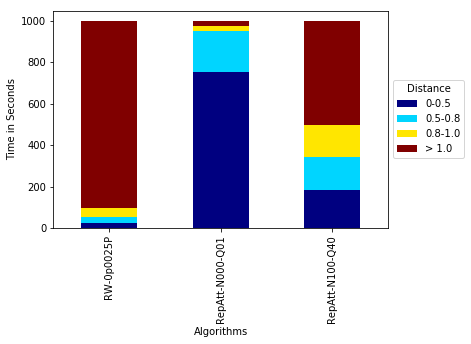

In [33]:
analysisFolder = soundResultPath + 'sound_analysis/'
pathlib.Path(analysisFolder).mkdir(parents=False,exist_ok=True)

logCSVcols = ['name', 'Time', 'xc', 'yc', 'theta', 'turn_prob', 'beacon_distance',
          'rep_neigh','rep_signal','call_neigh','call_signal','linear_dist',
          'rot_dist','wall_bounces','t_obstacle_avoidance','action','state']
timeList = [] # needed to keep list of time steps
colors = plt.cm.jet(np.linspace(0,1,30)) # 30 different colors for 30 simulations per algorithm

maxDbound = [0.5, 0.8, 1.0]
boundRange = ['{}-{}'.format(i,j) for i,j in zip([0,0.5,0.8],maxDbound)]
boundRange.append('> {}'.format(maxDbound[-1]))
maxDbound = np.append(maxDbound,np.Inf)

allIDdists = {'Mean': pd.DataFrame(index=boundRange),
             'CI95': pd.DataFrame(index=boundRange)}

for ID in uniqIDs:
    algIDsims = pd.DataFrame() #dataframe to keep each simulation as column
    algIDdist = pd.DataFrame(index=boundRange)
    sim = 0
    for sim,simTime in enumerate(glob(soundResultPath + '*' + ID + '*')):
        simData = pd.read_csv(simTime,header = None, sep = ':|,',
                              engine='python', names = logCSVcols)
#         display(simData)
        if len(simData['Time']) > len(timeList):#keep track of longest rows
            timeList = simData['Time']
        algIDsims[sim] = simData['beacon_distance']
        
        for ind in boundRange:
            if '>' in ind:
#                 print('here')
                minDbound = 1.0
                mDbound = np.Inf
            else:
                ind1 = ind.split('-')
                minDbound = float(ind1[0])
                mDbound = float(ind1[1])
                

                
            algIDdist.loc[ind,sim] = len(algIDsims[sim].loc[
                    (algIDsims[sim] >= minDbound)  & 
                    (algIDsims[sim] < mDbound)
                ])
#     if ID == 'RepAtt-Noise0pct-qsize1':
    display(algIDdist)
    allIDdists['Mean'][ID] = algIDdist.mean(axis=1)
    allIDdists['CI95'][ID] = algIDdist.std(axis=1) * 1.96 / np.sqrt(sim)
    beacon_distance_plots(algIDsims,timeList.values,analysisFolder,ID)
    display(ID,sim)

#plot analysis of all the algorithm's distance from the beacon
beacon_distance_analysis_plot(allIDdists,analysisFolder)
allIDdists['Mean'].to_csv(analysisFolder + 'simulationMean.csv')
allIDdists['CI95'].to_csv(analysisFolder + 'simulationCI95.csv')



In [26]:
allIDdists

{'Mean':                       0-0.5     0.5-0.8     0.8-1.0       > 1.0
 RW-0p0025P        22.000000   48.133333   63.500000  865.366667
 RepAtt-N000-Q01  809.000000  118.600000   21.933333   49.466667
 RepAtt-N100-Q40  124.466667  206.000000  196.700000  471.833333,
 'CI95':                      0-0.5    0.5-0.8    0.8-1.0      > 1.0
 RW-0p0025P        7.512109   8.268052  16.172392  31.222119
 RepAtt-N000-Q01  28.120898  18.339066   7.433213   9.730411
 RepAtt-N100-Q40  48.358555  38.044732  13.931008  89.666602}

In [34]:
maxDbound = np.arange(5) + 1
boundRange = ['{}-{}'.format(i,j) for i,j in enumerate(maxDbound)]
boundRange.append('> {}'.format(maxDbound[-1]))
boundRange
np.append(maxDbound,900)

array([  1,   2,   3,   4,   5, 900])